In [1]:
from Scripts import DID, behaviour
import numpy as np
import pickle 
from sklearn.model_selection import train_test_split
from itertools import product
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [ ]:
## Setup
path = 'E:\PhD\FEF_PUBLIC'
with open(fr'{path}\Data\pre_sessions.pkl', 'rb') as f:
    pre_sessions = pickle.load(f)
subj_keys = ['S1', 'S2', 'S3', 'S4', 'S5']
data_type = 'Choice'
params = ['PSE', 'Slope', 'Mean RT', 'Std RT']


+++ S1 psychometric permutation p values +++
combination 0
combination 1
combination 2
combination 3
combination 4
combination 5
combination 6
combination 7
combination 8
combination 9
combination 10
combination 11
combination 12
combination 13
combination 14
combination 15
combination 16
combination 17
combination 18
combination 19
combination 20
combination 21
combination 22
combination 23
0.31273401958498814 0.046277543109197405
0.30823749422682 0.04712487603367577
6.368434761965844e-05 0.5240541685486831
1.916959438279663e-05 0.5717978771816182
0.0327777543630742 0.1908943349402017
0.5681745553985192 0.01503233014096117
0.0005418025220134566 0.42639375398286483
0.0014690397004183823 0.3750021794946231
+++ S2 psychometric permutation p values +++
combination 0
combination 1
combination 2
combination 3
combination 4
combination 5
combination 6
combination 7
combination 8
combination 9
combination 10
combination 11
combination 12
combination 13
combination 14
combination 15
combinatio

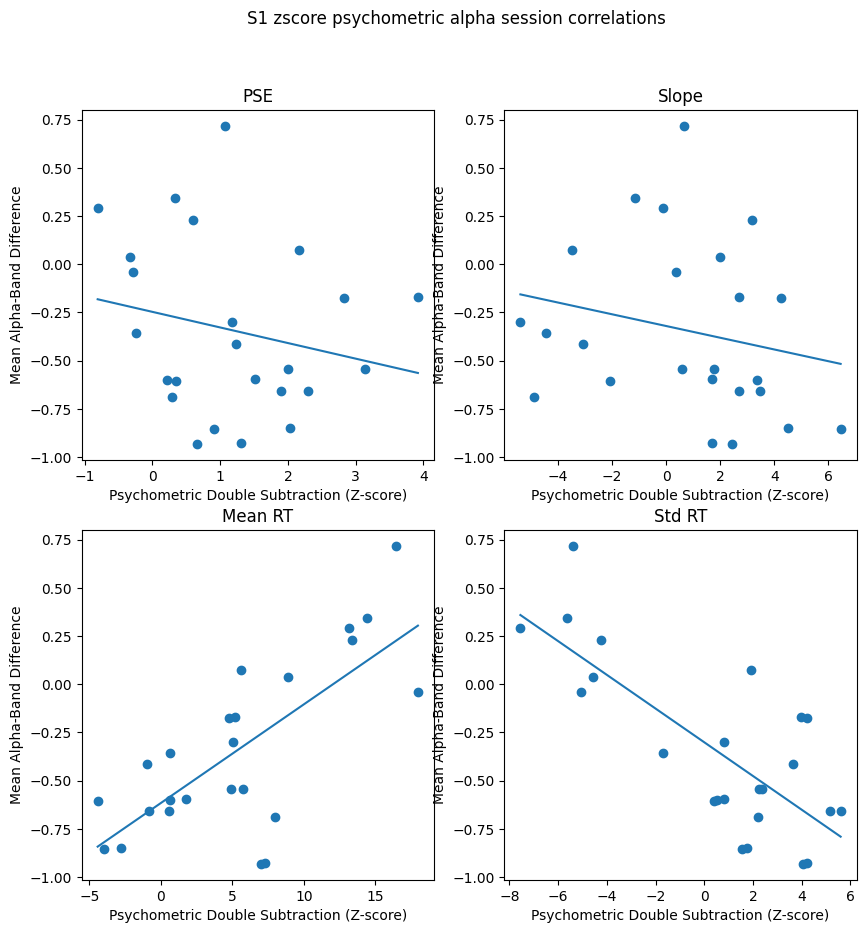

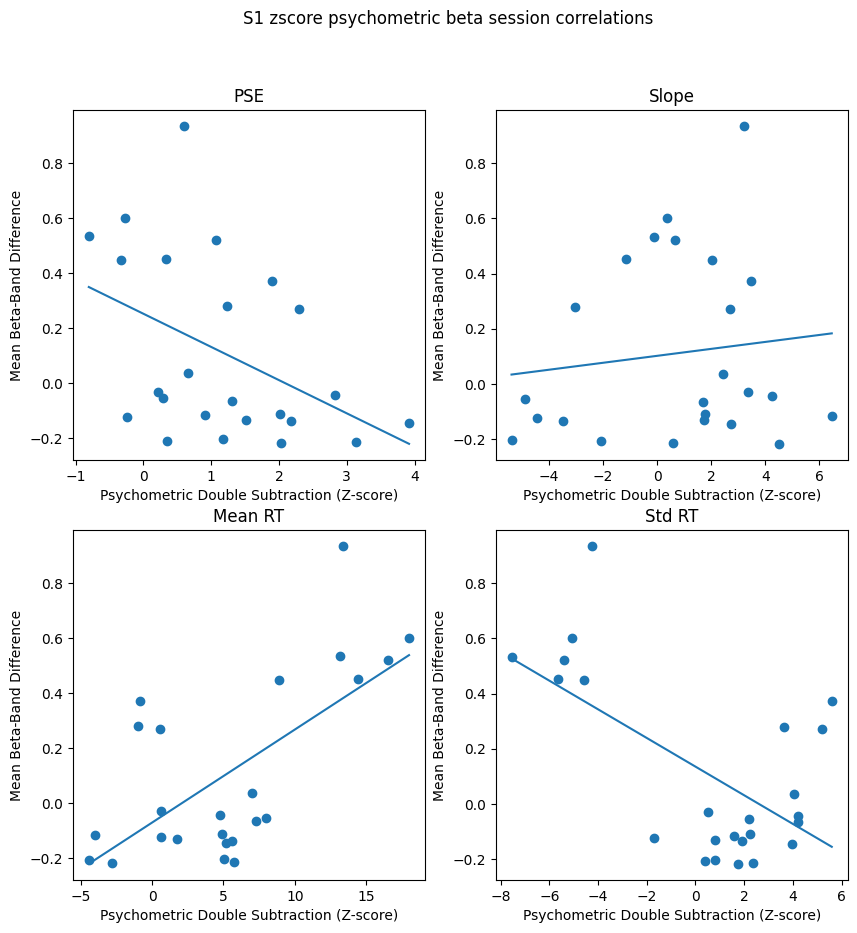

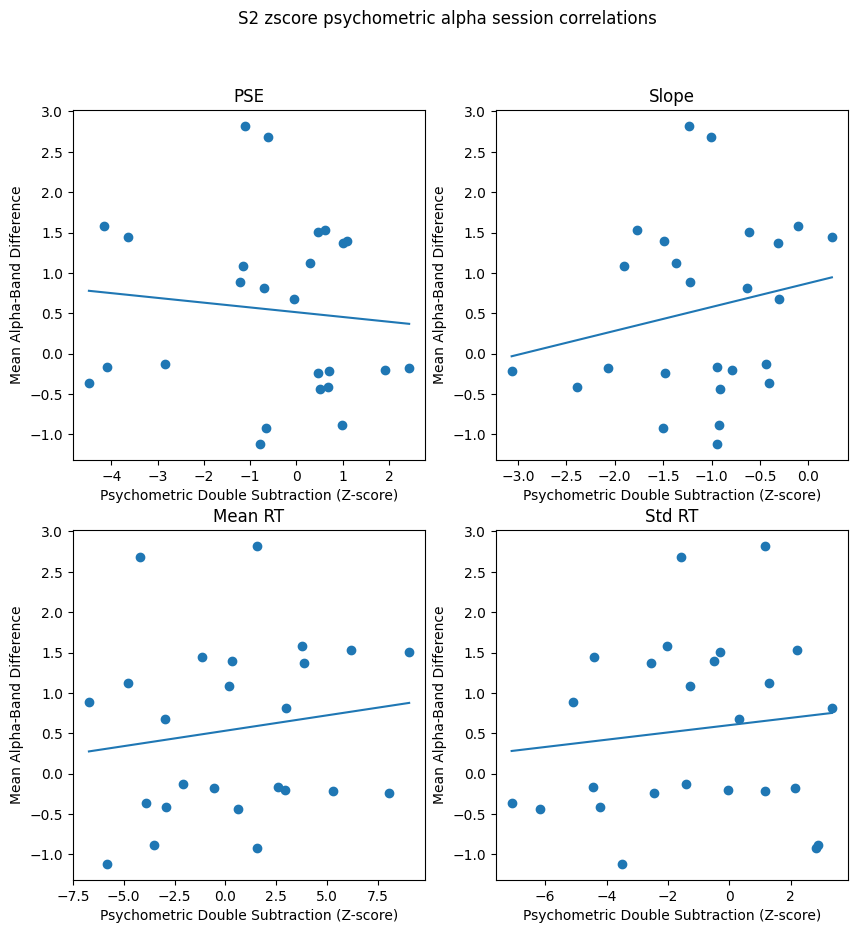

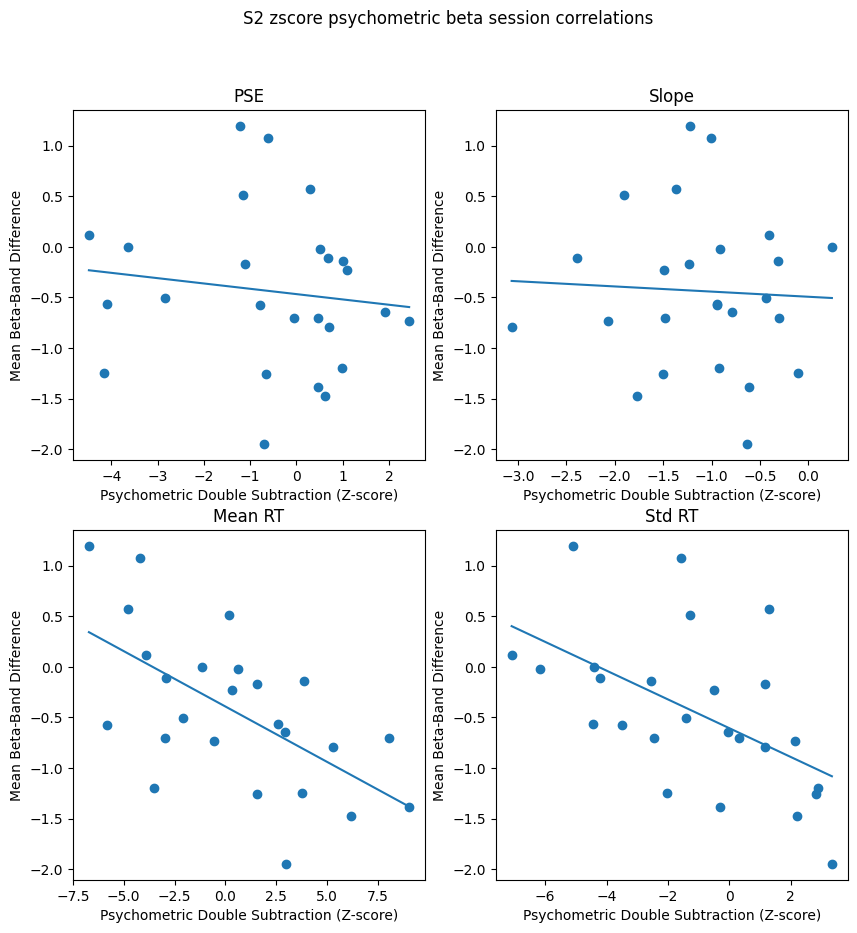

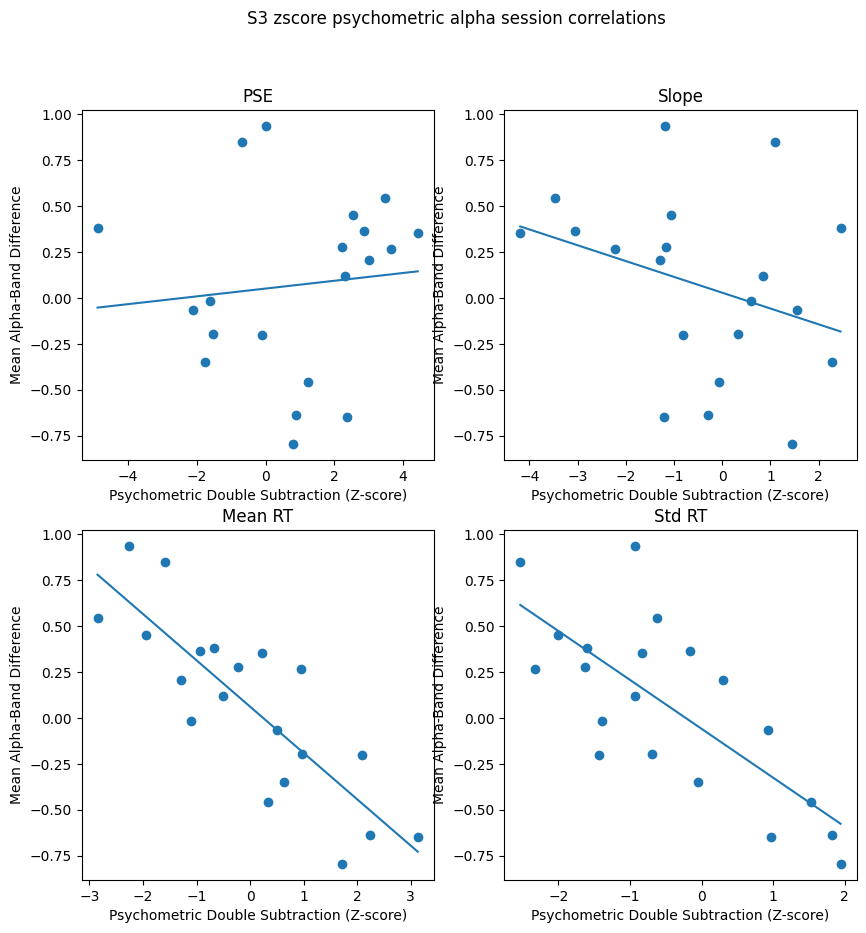

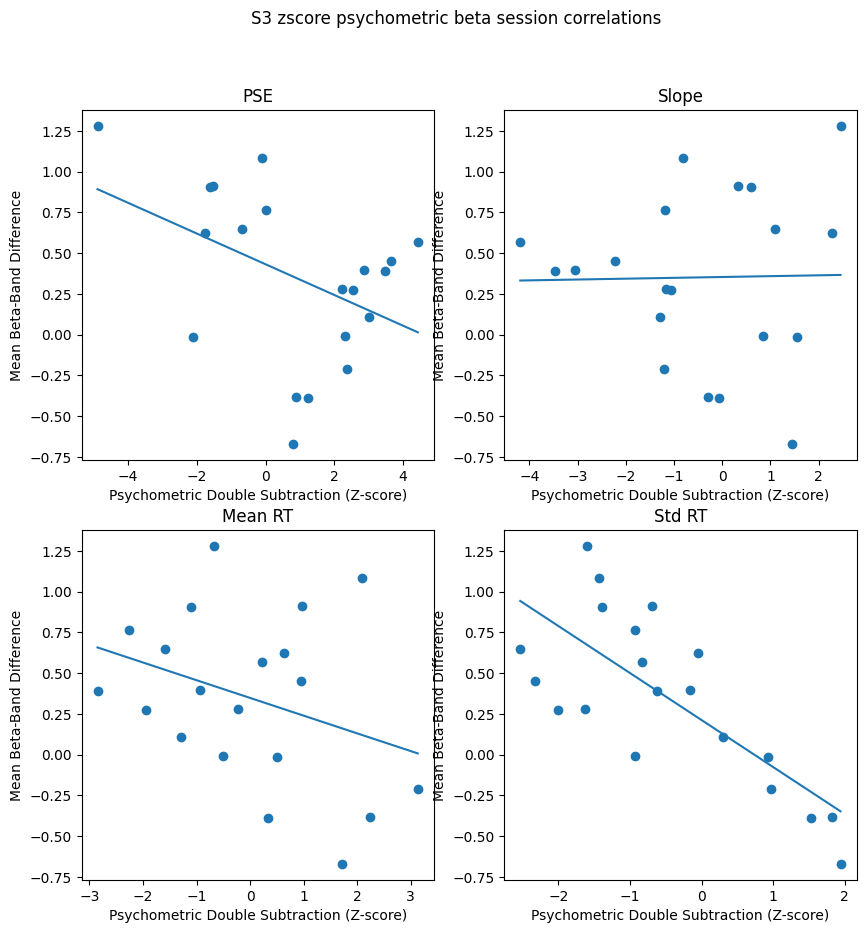

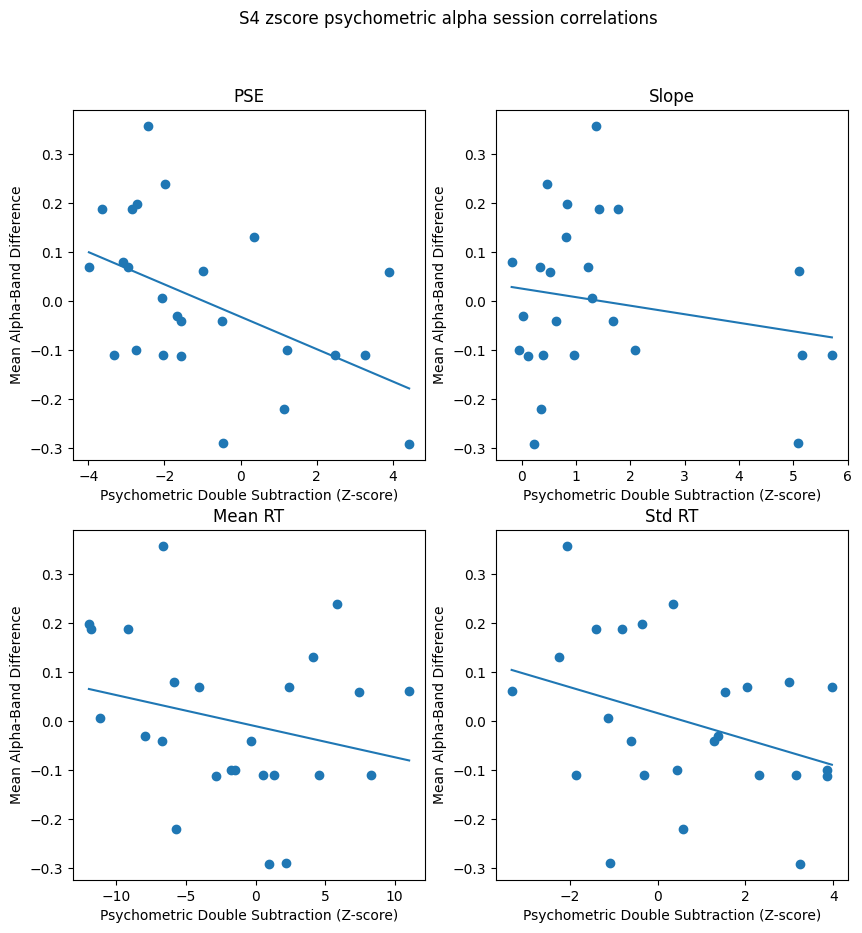

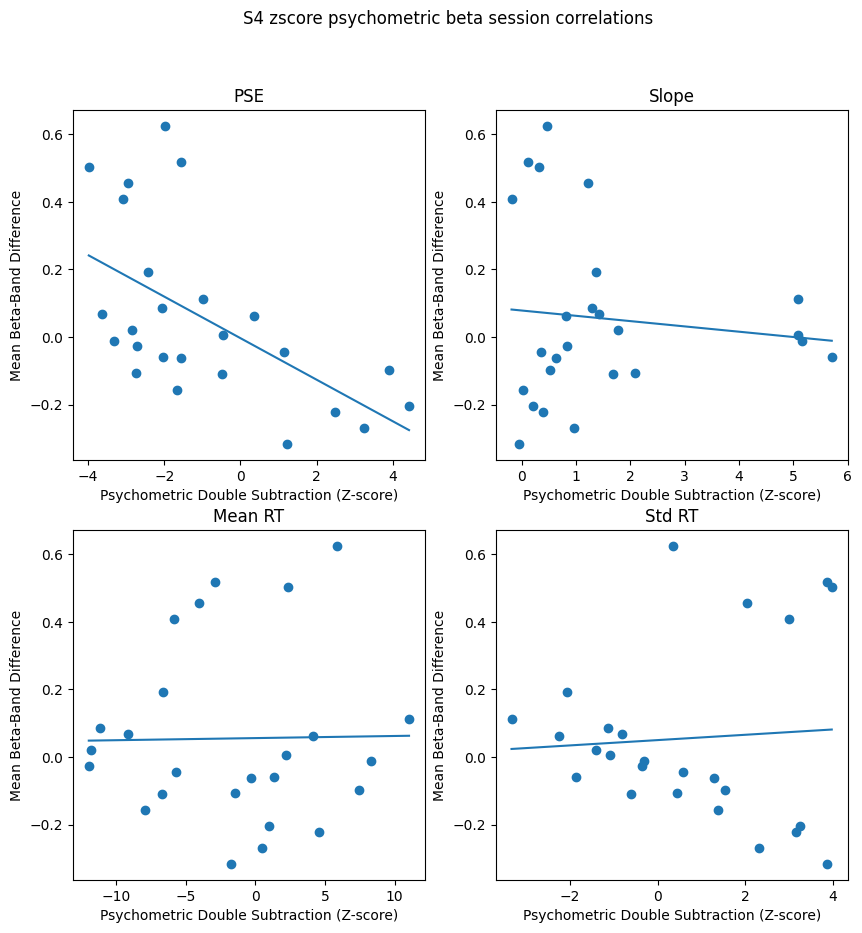

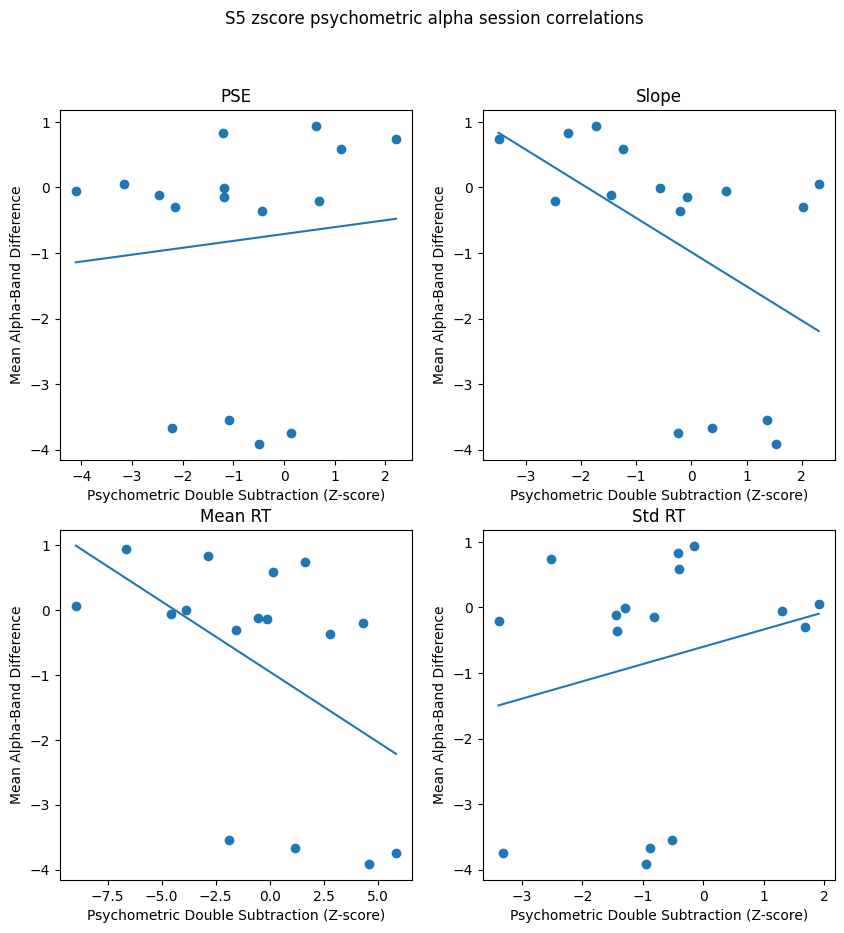

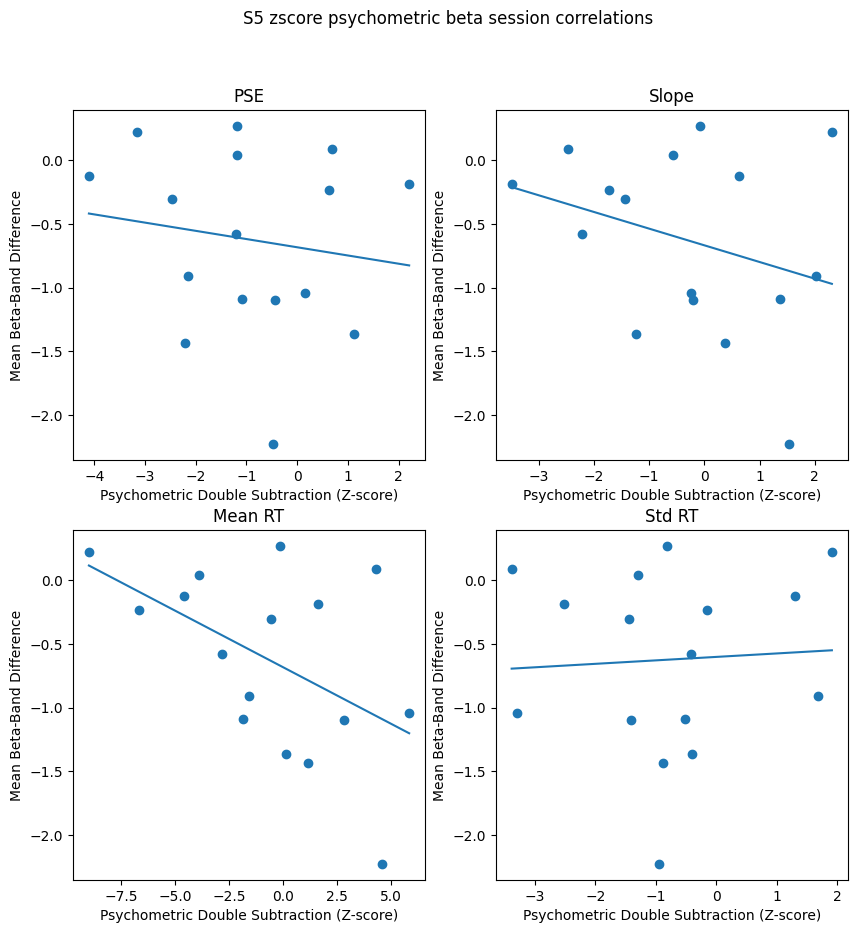

In [ ]:
## Correlate session z-scores with average alpha and beta subtractions...

for _, subj in enumerate(subj_keys):
    print(f'+++ {subj} psychometric permutation p values +++')
    anodal_dates = pre_sessions[subj]['AN'].keys()
    cathodal_dates = pre_sessions[subj]['CA'].keys()
    combinations = list(product(anodal_dates, cathodal_dates))
    zscore = np.zeros([4])
    alpha = np.zeros([1])
    beta = np.zeros([1])

    for combnum, combination in enumerate(combinations):
        ## Get psychometrics
        true = np.load(fr'{path}\Data\Psychometric Permutations\{subj}_session_combination_{combnum}_true.npy')
        null = np.load(fr'{path}\Data\Psychometric Permutations\{subj}_session_combination_{combnum}_null.npy')
        zscore = np.vstack((zscore, DID.zScoreParams(true, null)))


        ## Get corresponding EEG
        trueEEG = np.load(fr'{path}\Data\EEG Permutations\{subj}_session_combination_{combnum}_{data_type}_true.npy')
        alpha = np.vstack((alpha, np.mean(trueEEG[5:6, :])))
        beta = np.vstack((beta, np.mean(trueEEG[15:16, :])))
        print(f'combination {combnum}')

    zscore = np.delete(zscore, (0), axis = 0)
    alpha = np.delete(alpha, (0), axis = 0)[:,0]
    beta = np.delete(beta, (0), axis = 0)[:,0]


    fig = plt.figure(figsize=(10,10))
    for param in range(4):
        fig.add_subplot(221 + param)

        unsorted = np.vstack((zscore[:,param], alpha))
        #mask = np.argsort(unsorted[1])
        #sorted = unsorted[:, mask]  
        plt.scatter(unsorted[0,:], unsorted[1,:])
        b, a = np.polyfit(unsorted[0,:],  unsorted[1,:], deg=1)
        xseq = np.linspace(np.min(unsorted[0,:]), np.max(unsorted[0,:]), num=100)

        plt.plot(xseq, a + b * xseq)
        plt.title(f'{params[param]}')
        plt.xlabel(f'Psychometric Double Subtraction (Z-score)')
        plt.ylabel(f'Mean Alpha-Band Difference')
        plt.suptitle(f'{subj} zscore psychometric alpha session correlations')
        pvalue, rsquared = DID.fitLinearModel(unsorted[0,:], unsorted[1,:])
        print(pvalue, rsquared)


    fig = plt.figure(figsize=(10,10))
    for param in range(4):
        fig.add_subplot(221 + param)

        unsorted = np.vstack((zscore[:,param], beta))
        #mask = np.argsort(unsorted[1])
        #sorted = unsorted[:, mask]  
        plt.scatter(unsorted[0,:], unsorted[1,:])
        b, a = np.polyfit(unsorted[0,:],  unsorted[1,:], deg=1)
        xseq = np.linspace(np.min(unsorted[0,:]), np.max(unsorted[0,:]), num=100)

        plt.plot(xseq, a + b * xseq)
        plt.title(f'{params[param]}')
        plt.xlabel(f'Psychometric Double Subtraction (Z-score)')
        plt.ylabel(f'Mean Beta-Band Difference')
       
        pvalue, rsquared = DID.fitLinearModel(unsorted[0,:], unsorted[1,:])
        print(pvalue, rsquared)

        plt.suptitle(f'{subj} zscore psychometric beta session correlations')
